In [1]:
%matplotlib notebook
import numpy as np
import json
import os, math
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
from datetime import datetime

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.timing_tool import *
#from alvra_tools.channels_raw import *
from alvra_tools.utils import *
import glob
from ipyfilechooser import FileChooser

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

### Choose the json file:

In [2]:
fc = FileChooser('/sf/alvra/data/p19200/raw/scan_info/')
fc.use_dir_icons = True
display(fc)

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FileChooser(path='/sf/alvra/data/p19200/raw/scan_info', filename='', title='HTML(value='', layout=Layout(displ…

In [37]:
quantile_band = 0.5

channel_list = [channel_LaserSample, channel_LaserIzero, 'SARES12-CVME-EVR0:DUMMY_PV2_NBS', 'SLAAR11-LSCP1-FNS:CH1:VAL_GET']


from sfdata import SFScanInfo
scan = SFScanInfo(fc.selected)
vOD_deg = scan.readbacks

LaserSample = []
LaserIzero = []
LaserSample_calib = []
LaserIzero_calib = []

for i, step in enumerate(scan):
        check_files_and_data(step)
        clear_output(wait=True)
        filename = scan.files[i][0].split('/')[-1].split('.')[0]
        print ('Step {} of {}: Processing {}'.format(i+1, len(scan.files), filename))

        results, _ = load_data_compact(channel_list, step)
        
        LaserSample_shot = results[channel_LaserSample]      
        LaserIzero_shot = results[channel_LaserIzero]   
        
        LaserSample_shot_calib = results['SARES12-CVME-EVR0:DUMMY_PV2_NBS']      
        LaserIzero_shot_calib = results['SLAAR11-LSCP1-FNS:CH1:VAL_GET']  
        
        df_LaserSample = pd.DataFrame(LaserSample_shot)
        LaserSample.append(np.nanquantile(df_LaserSample, [0.5, 0.5 - quantile_band/2, 0.5 + quantile_band/2]))
        
        df_LaserIzero = pd.DataFrame(LaserIzero_shot)
        LaserIzero.append(np.nanquantile(df_LaserIzero, [0.5, 0.5 - quantile_band/2, 0.5 + quantile_band/2]))
        
        LaserSample_calib.append(np.mean(LaserSample_shot_calib))
        LaserIzero_calib.append(np.mean(LaserIzero_shot_calib))
        
vOD_deg = vOD_deg[:np.shape(LaserSample)[0]]
LaserSample = np.asarray(LaserSample)
LaserIzero = np.asarray(LaserIzero)

print ("Job done!")
print ('Quantiles for error bars: {},{}'.format(0.5 - quantile_band/2, 0.5 + quantile_band/2))

Step 11 of 11: Processing run_010766

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet         502 / 502 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-LSCP10-FNS:CH0:VAL_GET  502 / 502 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES12-CVME-EVR0:DUMMY_PV2_NBS 501 / 502 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES12-LSCP11-FNS:CH4:VAL_GET  501 / 502 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SLAAR11-LSCP1-FNS:CH1:VAL_GET   502 / 502 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 501 / 502 -> 0% loss
complete channels: 3 / 5 -> 40% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 50.0 Hz
Job done!
Quantiles for error bars: 0.25,0.75


In [41]:
LaserSample_calib

[0.13996999999999998,
 0.16101479999999999,
 0.18117791164658634,
 0.19996439999999996,
 0.22630239043824701,
 0.26043466135458165,
 0.2862192,
 0.3,
 0.3,
 0.29999999999999993,
 0.3]

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


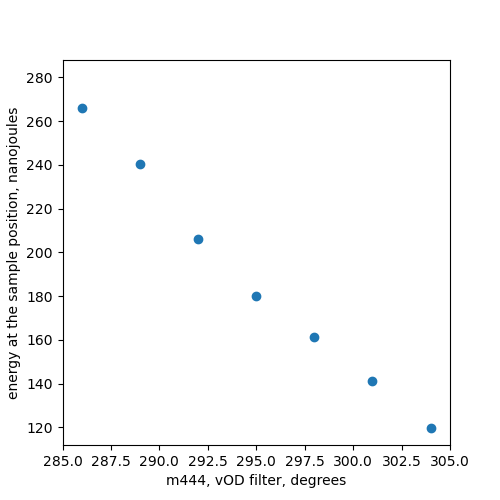

In [64]:
plt.figure(figsize=(5,5))
#plt.plot(vOD_deg, LaserIzero_calib/np.max(LaserIzero_calib))
plt.plot(vOD_deg, 1000*(np.asarray(LaserSample_calib)-0.02), 'o')
plt.xlim(285, 305)
plt.xlabel('m444, vOD filter, degrees')
plt.ylabel('energy at the sample position, nanojoules')
plt.tight_layout
plt.show()

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


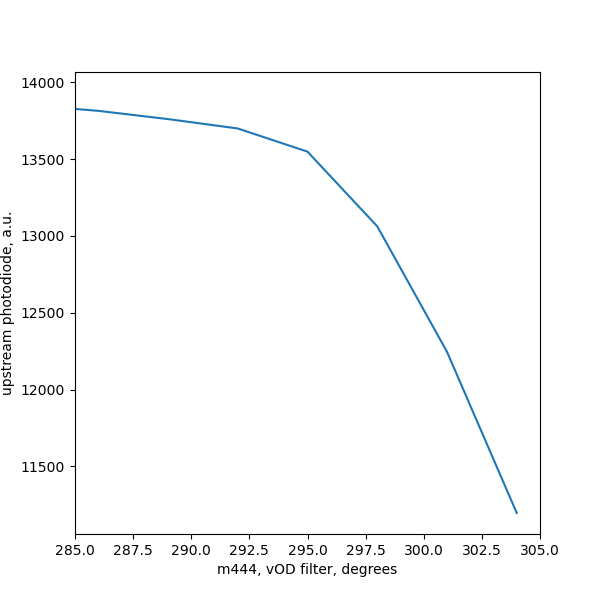

In [69]:
plt.figure(figsize=(6,6))
plt.plot(vOD_deg, LaserIzero_calib)
#plt.plot(vOD_deg, 1000*(np.asarray(LaserSample_calib)-0.02), 'o')
plt.xlim(285, 305)
plt.xlabel('m444, vOD filter, degrees')
plt.ylabel('upstream photodiode, a.u.')
#plt.tight_layout
plt.show()

<IPython.core.display.Javascript object>


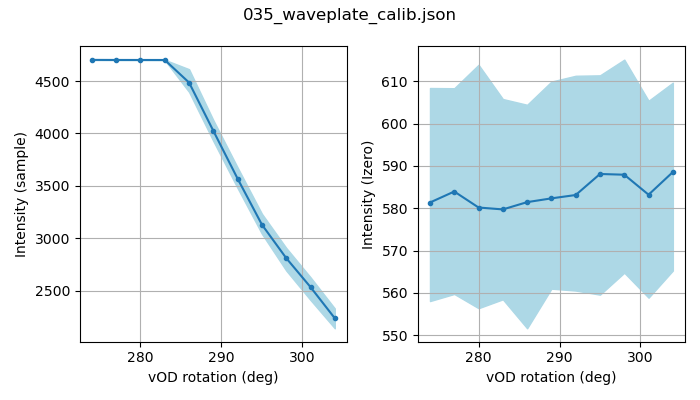

In [10]:
Int_Sample = LaserSample[:,0]
err_low_Sample = LaserSample[:,1]
err_high_Sample = LaserSample[:,2]

Int_Izero = LaserIzero[:,0]
err_low_Izero = LaserIzero[:,1]
err_high_Izero = LaserIzero[:,2]

fig = plt.figure(figsize=(7,4))
fig.suptitle(fc.selected_filename)

ax1 = fig.add_subplot(1,2,1)

ax1.plot(vOD_deg[:], Int_Sample, label='Sample position, {}%'.format(quantile_band*100),marker='.')
ax1.fill_between(vOD_deg[:], err_low_Sample, err_high_Sample, color='lightblue')
ax1.set_xlabel("vOD rotation (deg)")
ax1.set_ylabel("Intensity (sample)")

# ax2 = plt.twinx(ax1)
ax2 = fig.add_subplot(1,2,2)
ax2.plot(vOD_deg[:], Int_Izero, label='Izero, {}%'.format(quantile_band*100),marker='.')
ax2.fill_between(vOD_deg[:], err_low_Izero, err_high_Izero, color='lightblue')
ax2.set_xlabel("vOD rotation (deg)")
ax2.set_ylabel("Intensity (Izero)")

ax1.grid()
ax2.grid()

plt.tight_layout()
plt.show()

/das/work/p19/p19465/anaconda/alvra-analysis-p19465/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:5: DeprecationWarning: invalid escape sequence \m
<>:5: DeprecationWarning: invalid escape sequence \m
<ipython-input-6-27737bb8c4f4>:5: DeprecationWarning: invalid escape sequence \m
  plt.ylabel('pulse energy at the sample position, $\mu$J')


<IPython.core.display.Javascript object>


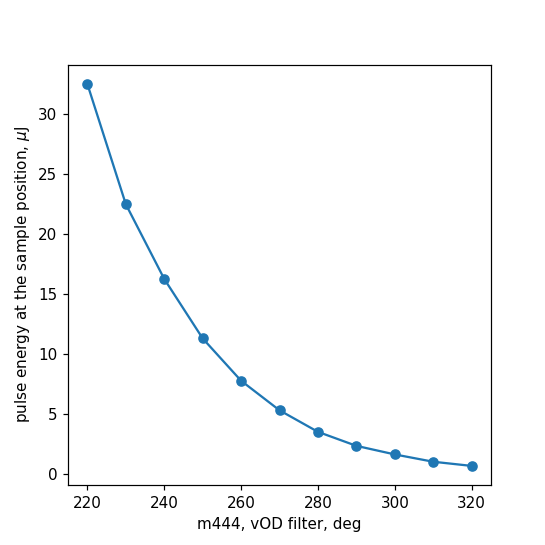

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [6]:
plt.figure(figsize=(5,5))
#plt.plot(Int_Sample/np.max(Int_Sample))
plt.plot(vOD_deg[:], LaserSample_calib,'-o')
plt.xlabel('m444, vOD filter, deg')
plt.ylabel('pulse energy at the sample position, $\mu$J')
plt.tight_layout

/das/work/p19/p19300/anaconda/alvra-analysis-p19300/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


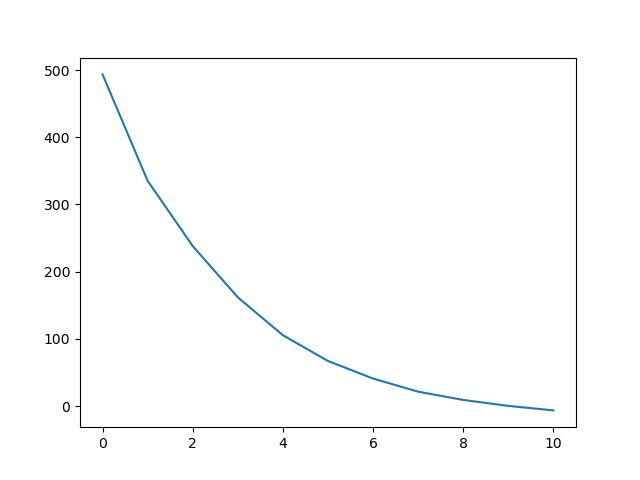

In [6]:
Int_Sample = LaserSample[:,0]
err_low_Sample = LaserSample[:,1]
err_high_Sample = LaserSample[:,2]

Int_Izero = LaserIzero[:,0]
err_low_Izero = LaserIzero[:,1]
err_high_Izero = LaserIzero[:,2]

plt.figure()
plt.plot(Int_Sample)

/das/work/p19/p19300/anaconda/alvra-analysis-p19300/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


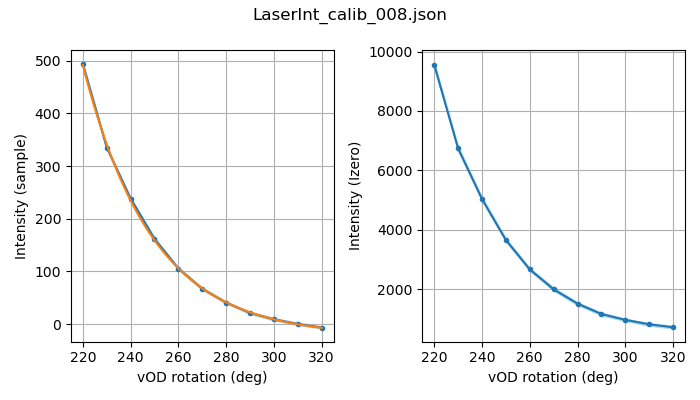

Exponential fit:  -23.3 + exp[ (x - 400.5)/28.9 ]


In [7]:
xdata = vOD_deg
ydata = Int_Sample

xgrid = np.linspace(vOD_deg[0], vOD_deg[-1], 500)

def exp_fit(xdata, xshift, a, offset):
    return (np.exp((-xdata + xshift)/a)+offset)

popt, pcov = curve_fit(exp_fit, xdata, ydata, p0=[310,20, -5])
fit_expression = ('{:.1f} + exp[ (x - {:.1f})/{:.1f} ]'.format(popt[2],popt[0],popt[1]))


fig = plt.figure(figsize=(7,4))
fig.suptitle(fc.selected_filename)

ax1 = fig.add_subplot(1,2,1)

l1 = ax1.plot(vOD_deg[:], Int_Sample, label='Intensity at sample position',marker='.')
ax1.fill_between(vOD_deg[:], err_low_Sample, err_high_Sample, color='lightblue')
ax1.set_xlabel("vOD rotation (deg)")
ax1.set_ylabel("Intensity (sample)")

# ax2 = plt.twinx(ax1)
ax2 = fig.add_subplot(1,2,2)
l2 = ax2.plot(vOD_deg[:], Int_Izero, label='Izero, {}%'.format(quantile_band*100),marker='.')
ax2.fill_between(vOD_deg[:], err_low_Izero, err_high_Izero, color='lightblue')
ax2.set_xlabel("vOD rotation (deg)")
ax2.set_ylabel("Intensity (Izero)")


l3 = ax1.plot(xgrid, exp_fit(xgrid, *popt), label=fit_expression)

# leg = l1 + l3
# labels = [l.get_label() for l in leg]
# ax1.legend(leg, labels, loc='best')

ax1.grid()
ax2.grid()

plt.tight_layout()
plt.show()

print ('Exponential fit: ', fit_expression)

## Inhouse p19161

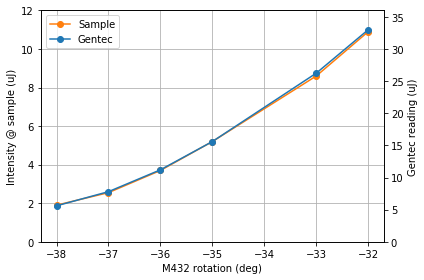

In [3]:
m432 = np.array([-38,-37,-36,-35,-33,-32])
gen = np.array([5.6,7.8,11.2,15.6,26.24,33.0])
sample = np.array([1.9,2.55,3.7,5.2,8.6,10.9])

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax2 = plt.twinx(ax1)

ax2._get_lines.prop_cycler = ax1._get_lines.prop_cycler

lns2 = ax2.plot(m432, gen, 'o-',label='Gentec')
lns1 = ax1.plot(m432, sample, 'o-', label='Sample')

ax1.set_xlabel('M432 rotation (deg)')
ax2.set_ylabel('Gentec reading (uJ)')
ax1.set_ylabel('Intensity @ sample (uJ)')

ax1.set_ylim(0,12)
ax2.set_ylim(0,36)

leg = lns1 + lns2
labels = [l.get_label() for l in leg]
ax1.legend(leg, labels, loc='best')
ax1.grid()

plt.tight_layout()

plt.show()

1.115 + 472.96*(cos( np.pi/180*(waveplate_deg - 49.74) ))**2


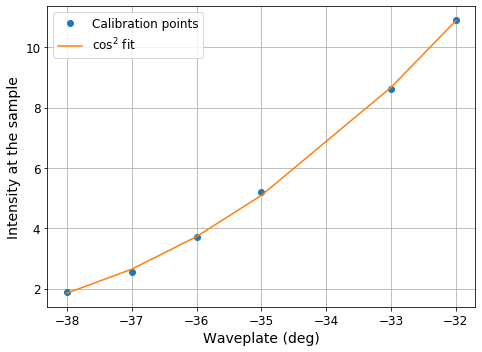

In [33]:
xdata = m432
ydata = sample

def cosine_fit(xdata, xshift, yshift, yscale):
    return yshift + yscale*(np.cos(np.pi/180.*(xdata - xshift)))**2

popt, pcov = curve_fit(cosine_fit, xdata, ydata)
print('{:.3f} + {:.2f}*(cos( np.pi/180*(waveplate_deg - {:.2f}) ))**2'.format(popt[1],popt[2],popt[0]))

plt.figure(figsize=(6.8,5))
plt.plot(xdata, ydata, 'o', label='Calibration points', linestyle='none')
plt.plot(xdata, cosine_fit(xdata, *popt), label=r'cos$^2$ fit')

plt.xlabel('Waveplate (deg)', fontsize=14)
plt.ylabel('Intensity at the sample', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid()
plt.legend(fontsize=12)

plt.tight_layout()

plt.show()

In [ ]:
fluences = 0.20514 +346.78 * (np.cos(np.pi/180*(Waveplate_deg-768.56)))**2

## User experiment Cordones p18956

<Figure size 432x288 with 0 Axes>

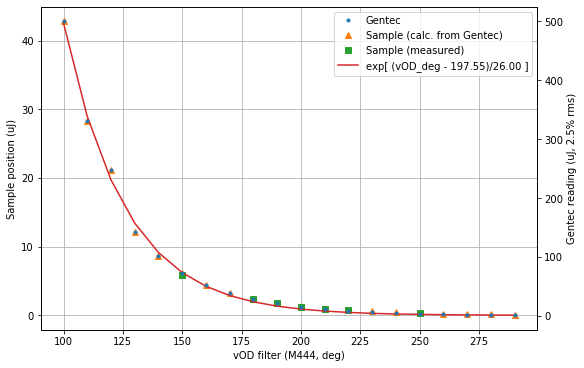

In [72]:
m444 = np.arange(100,300,10)
gen = np.array([500, 331, 247, 142, 101, 72, 52.5, 38.8, 28.8, 21.5, 15.5, 11.8, 9.0, 6.82, 5.23, 4.00, 3.03, 2.31, 1.74, 1.3])
sample = gen*0.08567 - 0.02638
m444_2 = np.array([250,220,210,200,190,180,150])
sample_2 = np.array([0.35, 0.75, 0.98, 1.28, 1.76, 2.34, 5.89])

fig = plt.figure()

fig, ax1 = plt.subplots(1,1,figsize=(8,5),constrained_layout=True)
ax2 = plt.twinx(ax1)

ax2._get_lines.prop_cycler = ax1._get_lines.prop_cycler

lns1 = ax2.plot(m444, gen, '.',label='Gentec')
lns2 = ax1.plot(m444, sample, '^', label='Sample (calc. from Gentec)')
lns3 = ax1.plot(m444_2, sample_2, 's', label='Sample (measured)')

xdata = m444
ydata = sample

# def cosine_fit(xdata, xshift, yshift, yscale):
#     return yshift + yscale*(np.cos(np.pi/180.*(xdata - xshift)))**2

def exp_fit(xdata, xshift, a):
    return (np.exp((-xdata + xshift)/a))

popt, pcov = curve_fit(exp_fit, xdata, ydata, p0=[210,20])
fit_expression = ('exp[ (vOD_deg - {:.2f})/{:.2f} ]'.format(popt[0],popt[1]))

# plt.figure(figsize=(6.8,5))
# plt.plot(xdata, ydata, 'o', label='Calibration points', linestyle='none')
lns4 = ax1.plot(xdata, exp_fit(xdata, *popt), label=fit_expression)

ax1.set_xlabel('vOD filter (M444, deg)')
ax2.set_ylabel('Gentec reading (uJ, 2.5% rms)')
ax1.set_ylabel('Sample position (uJ)')

# ax1.set_ylim(0,12)
# ax2.set_ylim(0,36)

leg = lns1 + lns2 + lns3 + lns4
labels = [l.get_label() for l in leg]
ax1.legend(leg, labels, loc='best')
ax1.grid()

# plt.tight_layout()


plt.show()

In [9]:
sample


array([42.80862  , 28.33039  , 21.13411  , 12.13876  ,  8.62629  ,
        6.14186  ,  4.471295 ,  3.297616 ,  2.440916 ,  1.815525 ,
        1.301505 ,  0.984526 ,  0.74465  ,  0.5578894,  0.4216741,
        0.3163   ,  0.2332001,  0.1715177,  0.1226858,  0.084991 ])

## Inhouse p19198

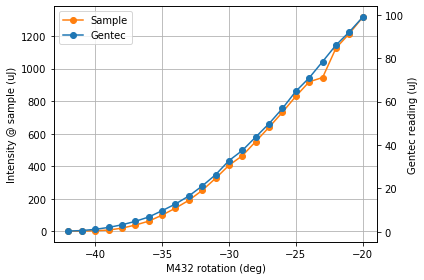

In [6]:
m432 = np.arange(-42, -19)
gen = np.array([0.3, 0.56, 1.1, 2.0, 3.2, 4.8, 6.8, 9.7, 12.8, 16.5, 21.1, 26.3,
                32.8, 37.5, 43.7, 49.9, 56.9, 64.8, 71.0, 78.5, 86.1, 92.2, 99])
sample = np.array([63, 63, 65.4, 70.3, 81.2, 99.1, 125, 162, 204, 252, 316, 389,
                  470, 530, 617, 704, 796, 895, 983, 1010, 1190, 1280, 1380])
offset = np.array([61,61,61,62,61,60,62,62,61,61,64,63,64,65,65,64,64,65,64,65,64,65,64])

sample -= offset

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax2 = plt.twinx(ax1)

ax2._get_lines.prop_cycler = ax1._get_lines.prop_cycler

lns2 = ax2.plot(m432, gen, 'o-',label='Gentec')
lns1 = ax1.plot(m432, sample, 'o-', label='Sample')

ax1.set_xlabel('M432 rotation (deg)')
ax2.set_ylabel('Gentec reading (uJ)')
ax1.set_ylabel('Intensity @ sample (uJ)')

# ax1.set_ylim(0,12)
# ax2.set_ylim(0,36)

leg = lns1 + lns2
labels = [l.get_label() for l in leg]
ax1.legend(leg, labels, loc='best')
ax1.grid()

plt.tight_layout()

plt.show()

-12.984 + 9978.00*(cos( np.pi/180*(waveplate_deg - -3551.59) ))**2


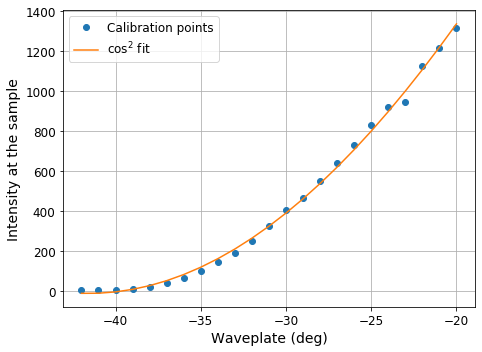

In [8]:
xdata = m432
ydata = sample

def cosine_fit(xdata, xshift, yshift, yscale):
    return yshift + yscale*(np.cos(np.pi/180.*(xdata - xshift)))**2

popt, pcov = curve_fit(cosine_fit, xdata, ydata)
print('{:.3f} + {:.2f}*(cos( np.pi/180*(waveplate_deg - {:.2f}) ))**2'.format(popt[1],popt[2],popt[0]))

plt.figure(figsize=(6.8,5))
plt.plot(xdata, ydata, 'o', label='Calibration points', linestyle='none')
plt.plot(xdata, cosine_fit(xdata, *popt), label=r'cos$^2$ fit')

plt.xlabel('Waveplate (deg)', fontsize=14)
plt.ylabel('Intensity at the sample', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid()
plt.legend(fontsize=12)

plt.tight_layout()

plt.show()

In [ ]:
fit: -12.984 + 9978.00*(cos( np.pi/180*(waveplate_deg + 3551.59) ))**2

cos2 fit:  -12.984 + 9978.00*(cos( np.pi/180*(waveplate_deg + 3551.59) ))**2
poly fit:  2.802 x**2 + 235.619 x + 4935.96


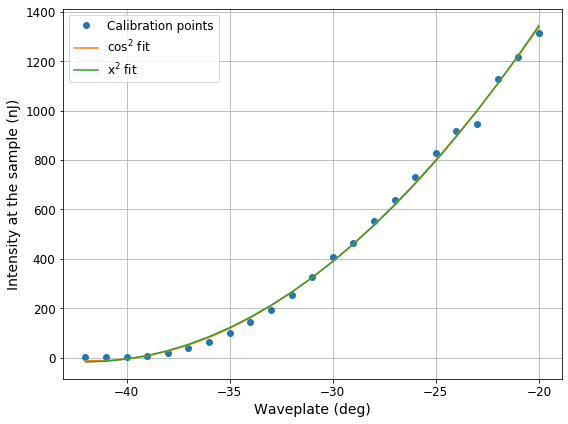

In [20]:
xdata = m432
ydata = sample

def cosine_fit(xdata, xshift, yshift, yscale):
    return yshift + yscale*(np.cos(np.pi/180.*(xdata - xshift)))**2

popt, pcov = curve_fit(cosine_fit, xdata, ydata)
coef = np.polyfit(xdata, ydata, 2)
print('cos2 fit:  {:.3f} + {:.2f}*(cos( np.pi/180*(waveplate_deg + {:.2f}) ))**2'.format(popt[1],popt[2],-popt[0]))
print('poly fit:  {:.3f} x**2 + {:.3f} x + {:.2f}'.format(coef[0],coef[1],coef[2]))

plt.figure(figsize=(8,6))
plt.plot(xdata, ydata, 'o', label='Calibration points', linestyle='none')
plt.plot(xdata, cosine_fit(xdata, *popt), label=r'cos$^2$ fit')
plt.plot(xdata, np.polyval(coef, xdata), label=r'x$^2$ fit')

plt.xlabel('Waveplate (deg)', fontsize=14)
plt.ylabel('Intensity at the sample (nJ)', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid()
plt.legend(fontsize=12)

plt.tight_layout()

plt.show()

## p19465

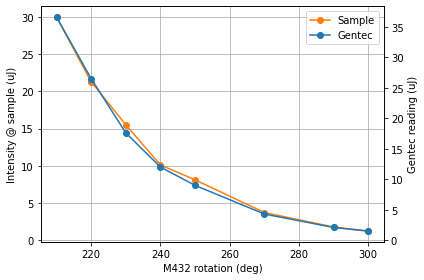

In [2]:
m432 = np.array([300,290,270,250,240,230,220,210])

gen = np.array([1.5,2.1,4.3,9,12,17.6,26.5,36.6])
sample = np.array([1.2,1.75,3.7,8.1,10.1,15.5,21.3,30])


# offset = np.array([61,61,61,62,61,60,62,62,61,61,64,63,64,65,65,64,64,65,64,65,64,65,64])

# sample -= offset

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax2 = plt.twinx(ax1)

ax2._get_lines.prop_cycler = ax1._get_lines.prop_cycler

lns2 = ax2.plot(m432, gen, 'o-',label='Gentec')
lns1 = ax1.plot(m432, sample, 'o-', label='Sample')

ax1.set_xlabel('M432 rotation (deg)')
ax2.set_ylabel('Gentec reading (uJ)')
ax1.set_ylabel('Intensity @ sample (uJ)')

# ax1.set_ylim(0,12)
# ax2.set_ylim(0,36)

leg = lns1 + lns2
labels = [l.get_label() for l in leg]
ax1.legend(leg, labels, loc='best')
ax1.grid()

plt.tight_layout()

plt.show()

<Figure size 432x288 with 0 Axes>

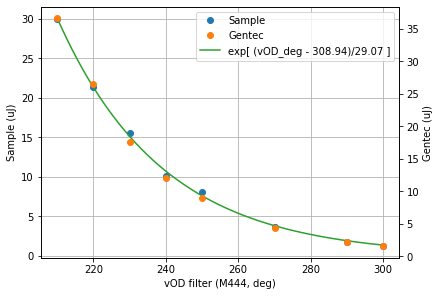

In [48]:
m444 = np.array([300,290,270,250,240,230,220,210])
gen = np.array([1.5,2.1,4.3,9,12,17.6,26.5,36.6])
sample = np.array([1.2,1.75,3.7,8.1,10.1,15.5,21.3,30])


fig = plt.figure()

fig, ax1 = plt.subplots(1,1,constrained_layout=True)
ax2 = plt.twinx(ax1)

ax2._get_lines.prop_cycler = ax1._get_lines.prop_cycler

lns1 = ax1.plot(m444, sample, 'o', label='Sample')
lns2 = ax2.plot(m444, gen, 'o',label='Gentec')

xdata = m444
ydata = sample

# def cosine_fit(xdata, xshift, yshift, yscale):
#     return yshift + yscale*(np.cos(np.pi/180.*(xdata - xshift)))**2

def exp_fit(xdata, xshift, a):
    return (np.exp((-xdata + xshift)/a))

popt, pcov = curve_fit(exp_fit, xdata, ydata, p0=[210,20])
fit_expression = ('exp[ (vOD_deg - {:.2f})/{:.2f} ]'.format(popt[0],popt[1]))

xfit = np.linspace(xdata[0], xdata[-1], 1000)
yfit = exp_fit(xfit, *popt)

# plt.figure(figsize=(6.8,5))
# plt.plot(xdata, ydata, 'o', label='Calibration points', linestyle='none')
lns4 = ax1.plot(xfit, yfit, label=fit_expression)

ax1.set_xlabel('vOD filter (M444, deg)')
ax2.set_ylabel('Gentec (uJ)')
ax1.set_ylabel('Sample (uJ)')

# ax1.set_ylim(0,12)
# ax2.set_ylim(0,36)

leg = lns1 + lns2 + lns4
labels = [l.get_label() for l in leg]
ax1.legend(leg, labels, loc='best')
ax1.grid()

# plt.tight_layout()


plt.show()